In [1]:
### Two pdfs to be interpolated
### Try vertical morphing and then horizontal morphing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
x = np.linspace(70,110,1000)
m1 = 87
m2 = 92
s1 = 2
s2 = 1
y1 = norm.pdf(x,m1,s1)
y2 = norm.pdf(x,m2,s2)
z1 = norm.cdf(x,m1,s1)
z2 = norm.cdf(x,m2,s2)

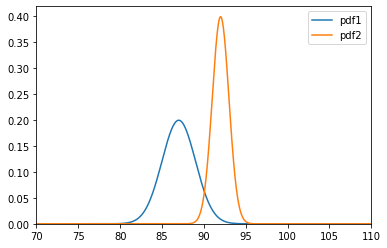

In [4]:
# The pdfs themselves
ax0 = plt.subplot(111)
ax0.plot(x,y1/np.trapz(y1,x), label="pdf1")
ax0.plot(x,y2/np.trapz(y2,x), label='pdf2')
ax0.set_xlim(x[0],x[-1])
ax0.set_ylim(bottom=0)
ax0.legend()

Text(0.5, 1.0, 'Vertical morphing')

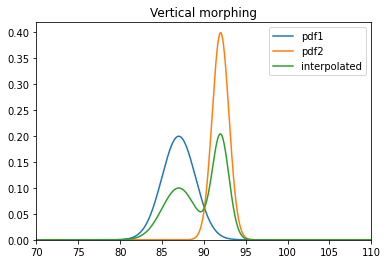

In [5]:
# Vertical morphing 
ax = plt.subplot(111)
ax.plot(x,y1/np.trapz(y1,x), label="pdf1")
ax.plot(x,y2/np.trapz(y2,x), label='pdf2')
yy = 0.5*(y1+y2)
ax.plot(x,yy/np.trapz(yy,x), label='interpolated')
ax.set_xlim(x[0],x[-1])
ax.set_ylim(bottom=0)
ax.legend()
ax.set_title("Vertical morphing")

In [6]:
# Setup the horizontal morphing
xx = np.empty(1000)
zz = np.empty(1000)   
ynew = np.empty(1000)
f  = 0.0
for i in range(1000):
    i1 = np.argmax(z1>f)
    i2 = np.argmax(z2>f)
    xx[i] = 0.5*(x[i1]+x[i2])
    zz[i]    = f
    ynew[i]  = 2*y1[i1]*y2[i2]/(y1[i1]+y2[i2])
    f = f+0.001

Text(0.5, 1.0, 'Horizontal interpolation of cdf')

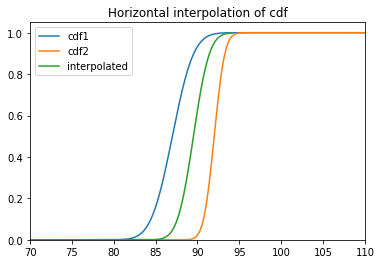

In [7]:
# Horizontal morphing of cumulative densities
ax2 = plt.subplot(111)
ax2.plot(x,z1, label="cdf1")
ax2.plot(x,z2, label="cdf2")
ax2.plot(xx,zz, label='interpolated')
ax2.set_xlim(x[0],x[-1])
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.set_title("Horizontal interpolation of cdf")

Text(0.5, 1.0, 'Horizontal morphing')

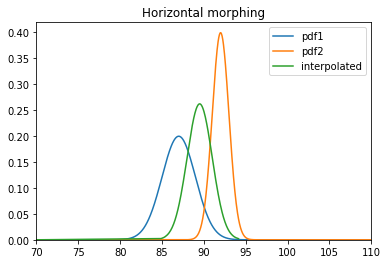

In [8]:
# Results from horizontal morphing
ax3 = plt.subplot(111)
ax3.plot(x,y1/np.trapz(y1,x),label="pdf1")
ax3.plot(x,y2/np.trapz(y2,x),label="pdf2")
ax3.plot(xx,ynew/np.trapz(ynew,xx),label='interpolated')
ax3.set_xlim(x[0],x[-1])
ax3.set_ylim(bottom=0)
ax3.legend()
ax3.set_title("Horizontal morphing")